AMATH584 HW2  
Kelton Busby

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
%matplotlib inline

# Data Read Test

Reading a cropped image:

In [3]:
plt.imread('yalefaces_cropped/CroppedYale/yaleB02/yaleB02_P00A+000E+00.pgm').shape

(192, 168)

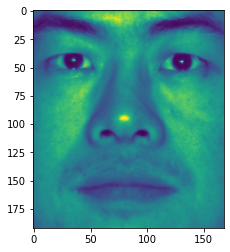

In [4]:
plt.imshow(plt.imread('yalefaces_cropped/CroppedYale/yaleB02/yaleB02_P00A+000E+00.pgm'))

Reading an uncropped image:

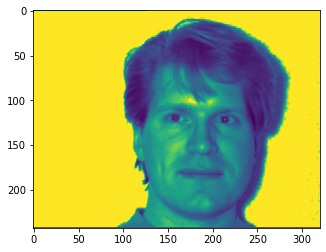

In [5]:
plt.imshow(plt.imread('yalefaces/subject01.centerlight'))

# Problem 1

In [6]:
# Iterate through the cropped images folder finding all files
filelist=[]
for root, dirs, files in os.walk(os.getcwd()+'\\yalefaces_cropped'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

number of images: 272


In [7]:
# Build a list of images from the files
images=[]
for imgfile in filelist:
    images.append(plt.imread(imgfile))

In [8]:
# create a list of all array data from the images
A = []
for image in images:
    A.append(np.reshape(image,(-1,1)))

# create array from data
A = np.array(A).squeeze()
# check the shape of the array, each image is a column
print('A Shape:',A.transpose().shape)
A = A.transpose()

A Shape: (32256, 272)


In [9]:
#Perform the SVD, A not hermitian
u,s,vh = np.linalg.svd(A, full_matrices=True, hermitian=False)

In [10]:
u.shape

(32256, 32256)

In [11]:
s.shape

(272,)

s is diagonal, as expected.

In [12]:
vh.shape

(272, 272)

# Problem 2

Plotting the first few columns of A, and the reshaped columns of U:

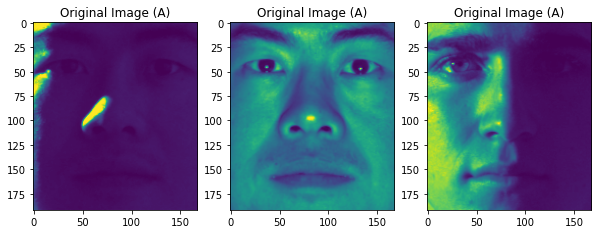

In [13]:
myfolks=np.random.randint(0,len(images),3)
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image (A)')
    plt.imshow(A[:,i].reshape(image.shape))

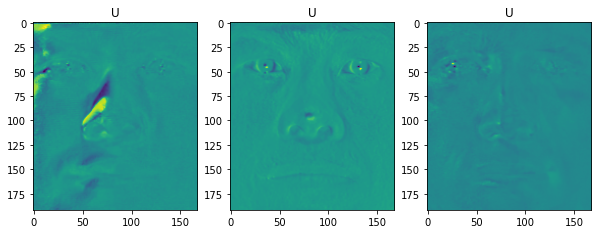

In [14]:
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('U')
    plt.imshow(u[i].reshape(image.shape))

## $U$

$U$ is an $m\times m$ unitary matrix ($U^*U=UU^*=I$) that represents a rotation of the space inhabited by $A$. Columns of $U$ are orthonormal vectors that form a basis.

In [15]:
u.shape

(32256, 32256)

## $\Sigma$

$\Sigma$ is an $m\times n$ non-negative all-real diagonal matrix. Each value on the diagonal represents a singular value (generally in decreasing order). The values represent lengths of the semiaxes of a hypersphere.

## $V^*$
$V^*$ is an $n\times n$ unitary matrix that applies a rotation to $A$ preserving the unit hypersphere.

In [16]:
vh.shape

(272, 272)

# Problem 3

We can look at the cumulative sum of singular values divided by the total of all singular values, which encapsulates a proportion of total "information" to some extent to reconstruct the image.

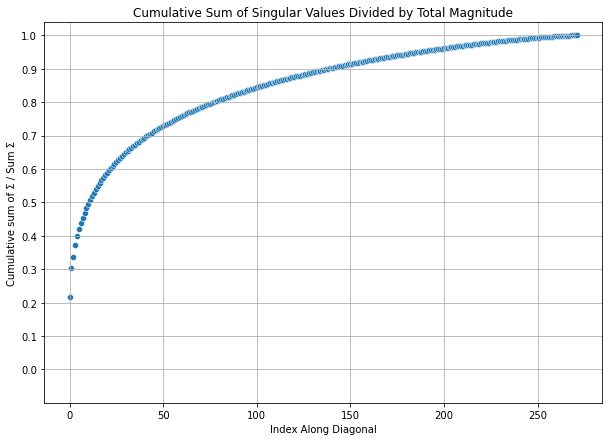

In [17]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=np.cumsum(s)/np.sum(s))
plt.ylim(-.1); plt.yticks(np.arange(0,1.1,.1))
plt.grid()
plt.ylabel('Cumulative sum of Σ / Sum Σ'); plt.xlabel('Index Along Diagonal');
plt.title('Cumulative Sum of Singular Values Divided by Total Magnitude');

Using just the first singular value, all pictures should look the same:

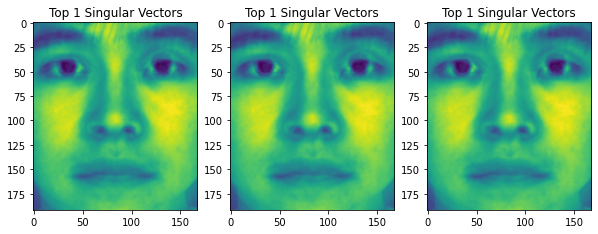

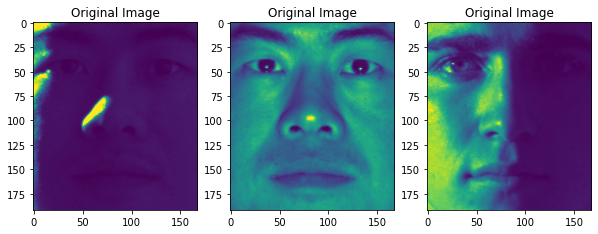

In [18]:
nc = 1
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
    plt.imshow(img[:,i].reshape(image.shape))
    plt.title('Top '+ str(nc)+' Singular Vectors')
    
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image')
    plt.imshow(A[:,i].reshape(image.shape))

Using 10 singular values:

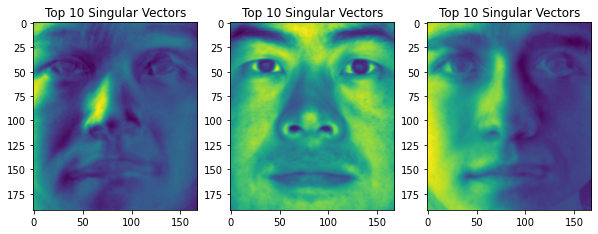

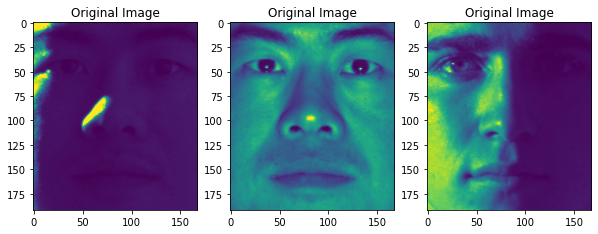

In [19]:
nc = 10
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
    plt.imshow(img[:,i].reshape(image.shape))
    plt.title('Top '+ str(nc)+' Singular Vectors')
    
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image')
    plt.imshow(A[:,i].reshape(image.shape))

We start to see some unique characteristics of each face.  

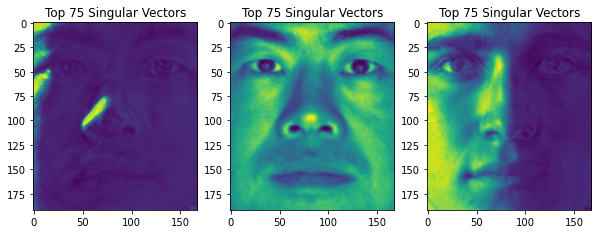

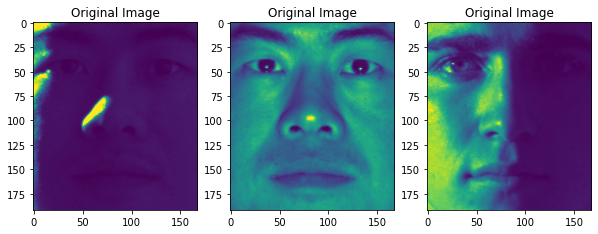

In [20]:
nc = 75
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
    plt.imshow(img[:,i].reshape(image.shape))
    plt.title('Top '+ str(nc)+' Singular Vectors')
    
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image')
    plt.imshow(A[:,i].reshape(image.shape))

With 75 modes, we have very good reconstruction of the images. This accounts for about 80% of the magnitude of all 270 modes.

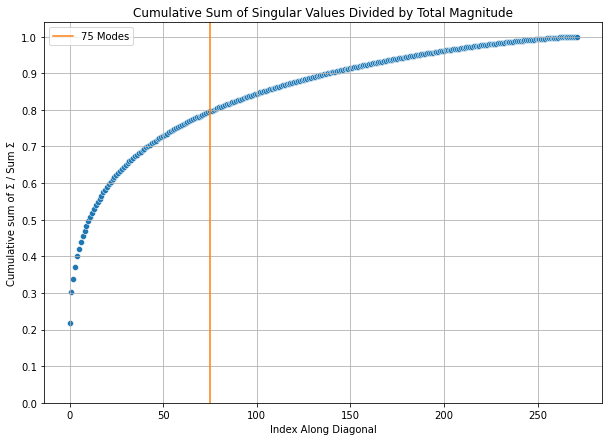

In [21]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=np.cumsum(s)/np.sum(s))
plt.ylim(0); plt.yticks(np.arange(0,1.1,.1))
plt.axvline(75, c='C1',label='75 Modes')
plt.grid(); plt.legend();
plt.ylabel('Cumulative sum of Σ / Sum Σ'); plt.xlabel('Index Along Diagonal');
plt.title('Cumulative Sum of Singular Values Divided by Total Magnitude');

# Problem 4

In [22]:
# Iterate through the cropped images folder finding all files
filelist=[]
for root, dirs, files in os.walk(os.getcwd()+'\\yalefaces'):
    for file in files:
        #append the file name to the list
        filelist.append(os.path.join(root,file))
        
print('number of images:',len(filelist))

number of images: 165


In [23]:
# Build a list of images from the files
images=[]
for imgfile in filelist:
    images.append(plt.imread(imgfile))

Check if the uncropped images are all the same size:

In [24]:
for image in images:
    if image.size != images[0].size:
        print('Different Size.')

In [25]:
# create a list of all array data from the images
A = []
for image in images:
    A.append(np.reshape(image,(-1,1)))

# create array from data
A = np.array(A).squeeze()
# check the shape of the array, each image is a column
print('A Shape:',A.transpose().shape)
A = A.transpose()

A Shape: (77760, 165)


In [26]:
#Perform the SVD, A not hermitian
U,S,Vh = np.linalg.svd(A, full_matrices=False, hermitian=False)

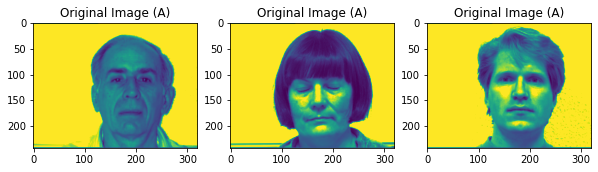

In [27]:
myfolks=np.random.randint(0,len(images),3)
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image (A)')
    plt.imshow(A[:,i].reshape(image.shape))

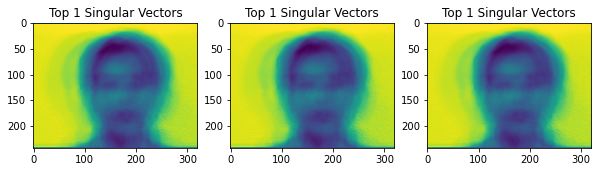

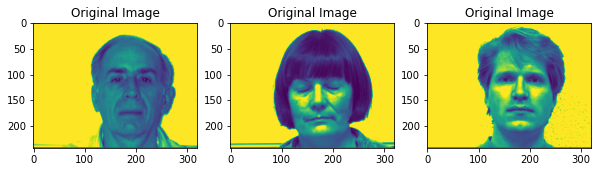

In [28]:
nc = 1
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    img = np.matrix(U[:,:nc])*np.diag(S[:nc])*np.matrix(Vh[:nc, :])
    plt.imshow(img[:,i].reshape(image.shape))
    plt.title('Top '+ str(nc)+' Singular Vectors')
    
plt.figure(figsize=[10,5])
for j,i in enumerate(myfolks):
    plt.subplot(1,3,j+1)
    plt.title('Original Image')
    plt.imshow(A[:,i].reshape(image.shape))

We get much less facial feature in the reconstruction with the top 1 singular value.

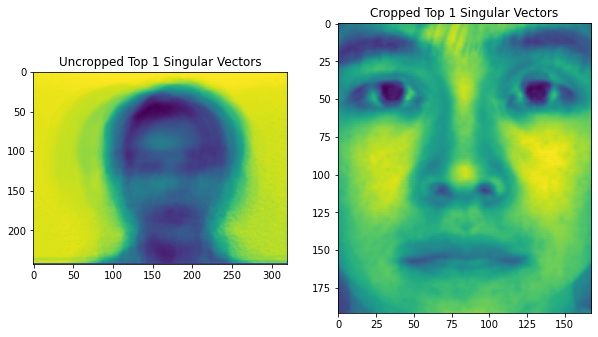

In [29]:
nc=1
plt.figure(figsize=[10,7])
plt.subplot(1,2,1)
img = np.matrix(U[:,:nc])*np.diag(S[:nc])*np.matrix(Vh[:nc, :])
plt.imshow(img[:,i].reshape(image.shape))
plt.title('Uncropped Top '+ str(nc)+' Singular Vectors')
plt.subplot(1,2,2)
img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
plt.imshow(img[:,i].reshape(192, 168))
plt.title('Cropped Top '+ str(nc)+' Singular Vectors');

Note the difference below with top 15 modes.

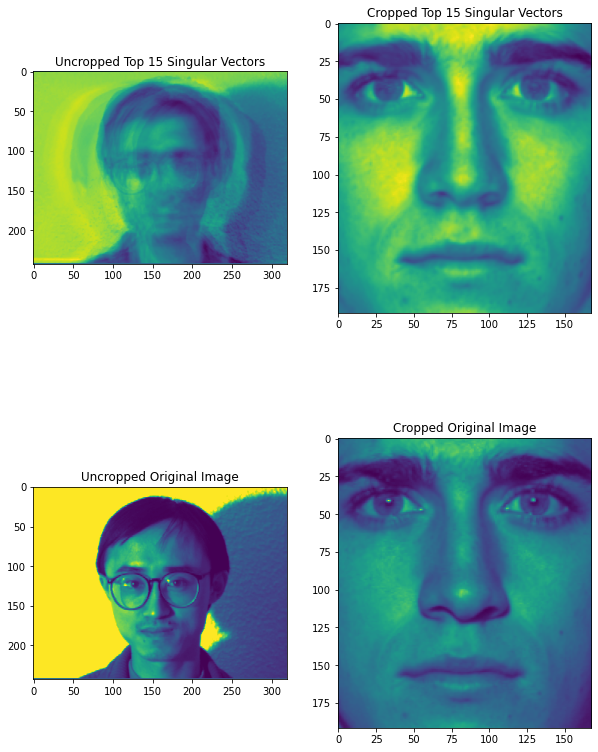

In [30]:
nc=15
plt.figure(figsize=[10,14])
plt.subplot(2,2,1)
img = np.matrix(U[:,:nc])*np.diag(S[:nc])*np.matrix(Vh[:nc, :])
plt.imshow(img[:,80].reshape(image.shape))
plt.title('Uncropped Top '+ str(nc)+' Singular Vectors')
plt.subplot(2,2,2)
img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
plt.imshow(img[:,150].reshape(192, 168))
plt.title('Cropped Top '+ str(nc)+' Singular Vectors');
plt.subplot(2,2,3)
plt.imshow(A[:,80].reshape(image.shape))
plt.title('Uncropped Original Image');
plt.subplot(2,2,4)
img = np.matrix(u[:,:len(s)])*np.diag(s[:len(s)])*np.matrix(vh[:len(s), :])
plt.imshow(img[:,150].reshape(192, 168))
plt.title('Cropped Original Image');

It takes many more modes to decently reconstruct a face with uncropped images.

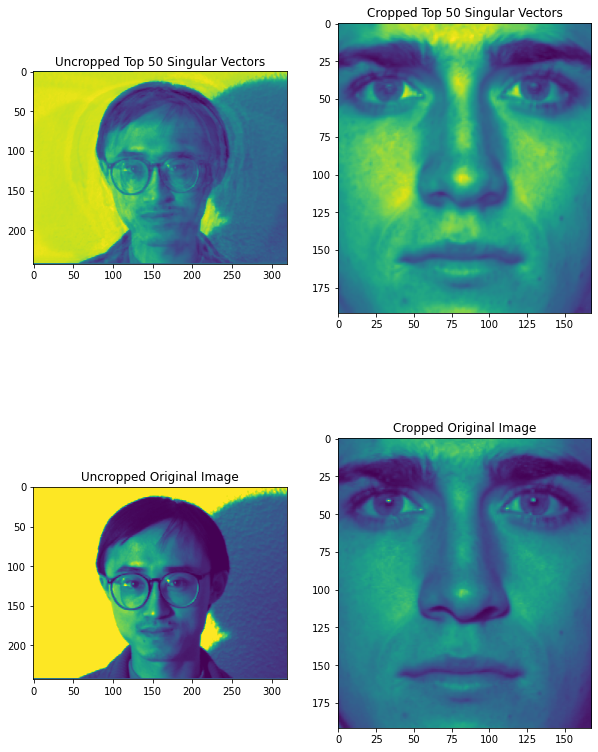

In [32]:
nc=50
plt.figure(figsize=[10,14])
plt.subplot(2,2,1)
img = np.matrix(U[:,:nc])*np.diag(S[:nc])*np.matrix(Vh[:nc, :])
plt.imshow(img[:,80].reshape(image.shape))
plt.title('Uncropped Top '+ str(nc)+' Singular Vectors')
plt.subplot(2,2,2)
img = np.matrix(u[:,:nc])*np.diag(s[:nc])*np.matrix(vh[:nc, :])
plt.imshow(img[:,150].reshape(192, 168))
plt.title('Cropped Top '+ str(nc)+' Singular Vectors');
plt.subplot(2,2,3)
plt.imshow(A[:,80].reshape(image.shape))
plt.title('Uncropped Original Image');
plt.subplot(2,2,4)
img = np.matrix(u[:,:len(s)])*np.diag(s[:len(s)])*np.matrix(vh[:len(s), :])
plt.imshow(img[:,150].reshape(192, 168))
plt.title('Cropped Original Image');

No handles with labels found to put in legend.


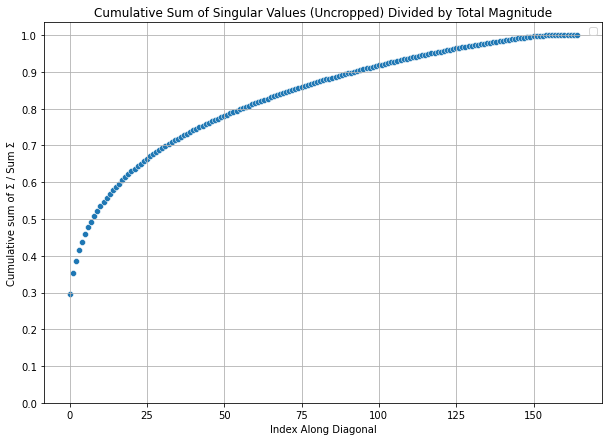

In [36]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=np.cumsum(S)/np.sum(S))
plt.ylim(0); plt.yticks(np.arange(0,1.1,.1))
plt.grid(); plt.legend();
plt.ylabel('Cumulative sum of Σ / Sum Σ'); plt.xlabel('Index Along Diagonal');
plt.title('Cumulative Sum of Singular Values (Uncropped) Divided by Total Magnitude');

Notice that the information encapsulated by the first singular value is actually a greater percentage of the total than for the cropped images. However, that information visually is just a blob like head in the center of the image. There is some detail of hair, eyes, nose, chin, but it is significantly less detailed than the first mode of the cropped images. The curves of increasing information with added modes are similarly shaped across their respective range of indicies.

Reconstruction capability with the uncropped version is significantly reduced (see pictures above.)